In [1]:
#%matplotlib widget
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
def Fits_Array(a):
    """Función para generar un array tridimensional de imágenes, siendo 'a'
    una lista con los pathnames de las imágenes que se quiere estackear"""
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[i])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [3]:
dl1=glob.glob('Dark_*')
dl2=glob.glob('DARK_*')

In [4]:
data1=Fits_Array(dl1)
data2=Fits_Array(dl2)

In [5]:
d1=np.nanmedian(data1,axis=2)
d2=np.nanmedian(data2,axis=2)

In [6]:
#Calculamos la desviacion estandar y promedio
std1=np.std(d1)
std2=np.std(d2)
m1=np.mean(d1)
m2=np.mean(d2)

In [7]:
d1[d1-m1<5*std1]=1
d1[d1-m1>5*std1]=0

In [8]:
d2[d2-m2<5*std2]=1
d2[d2-m2>5*std2]=0

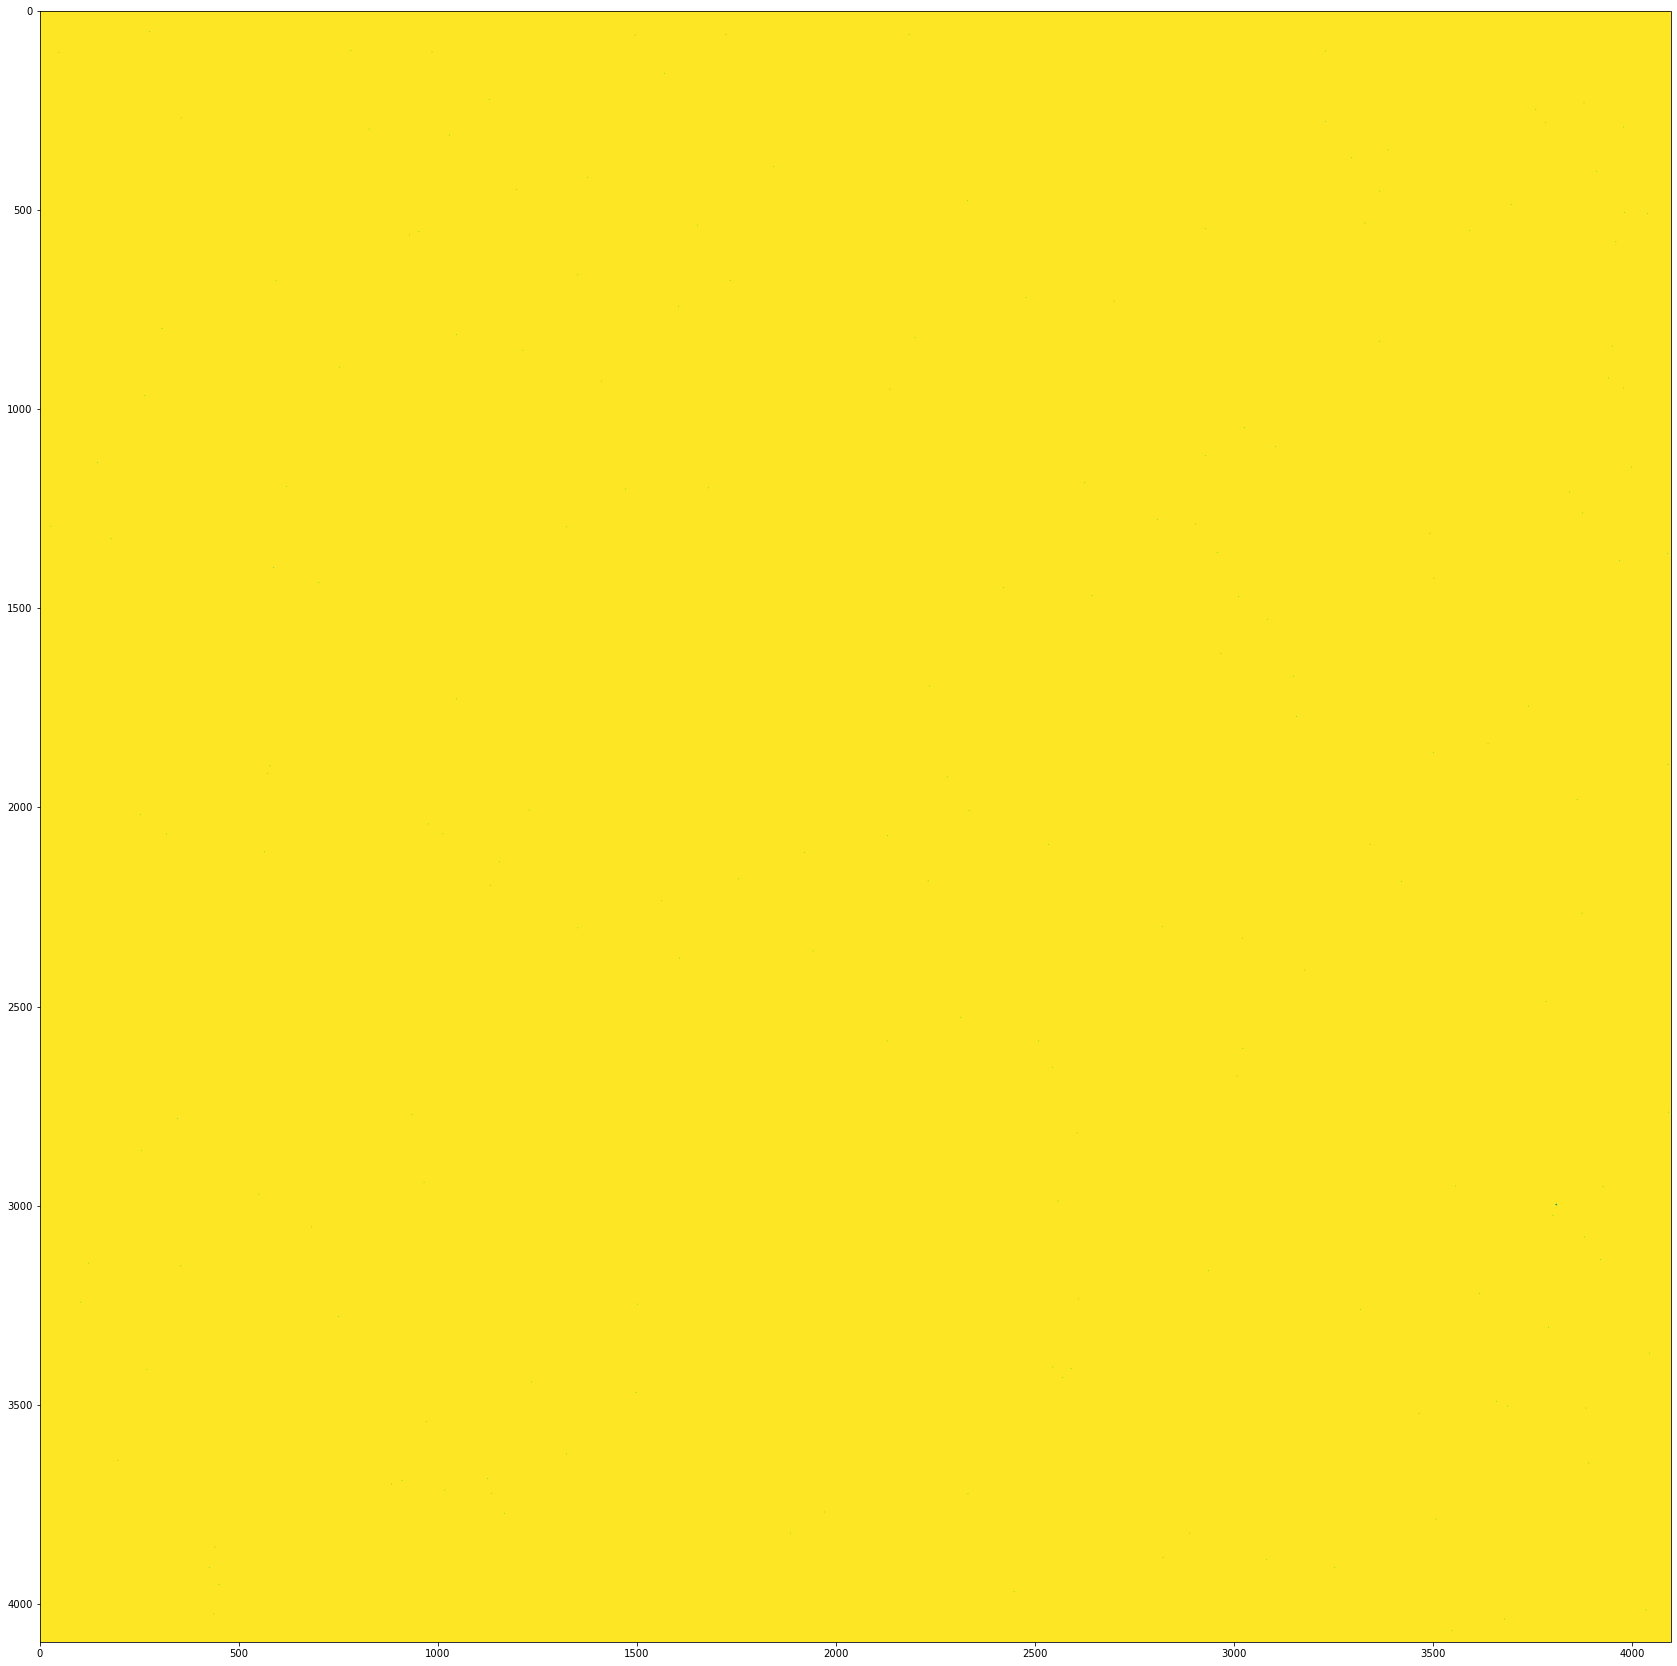

In [9]:
plt.figure(figsize=(30,30))
plt.imshow(d1)

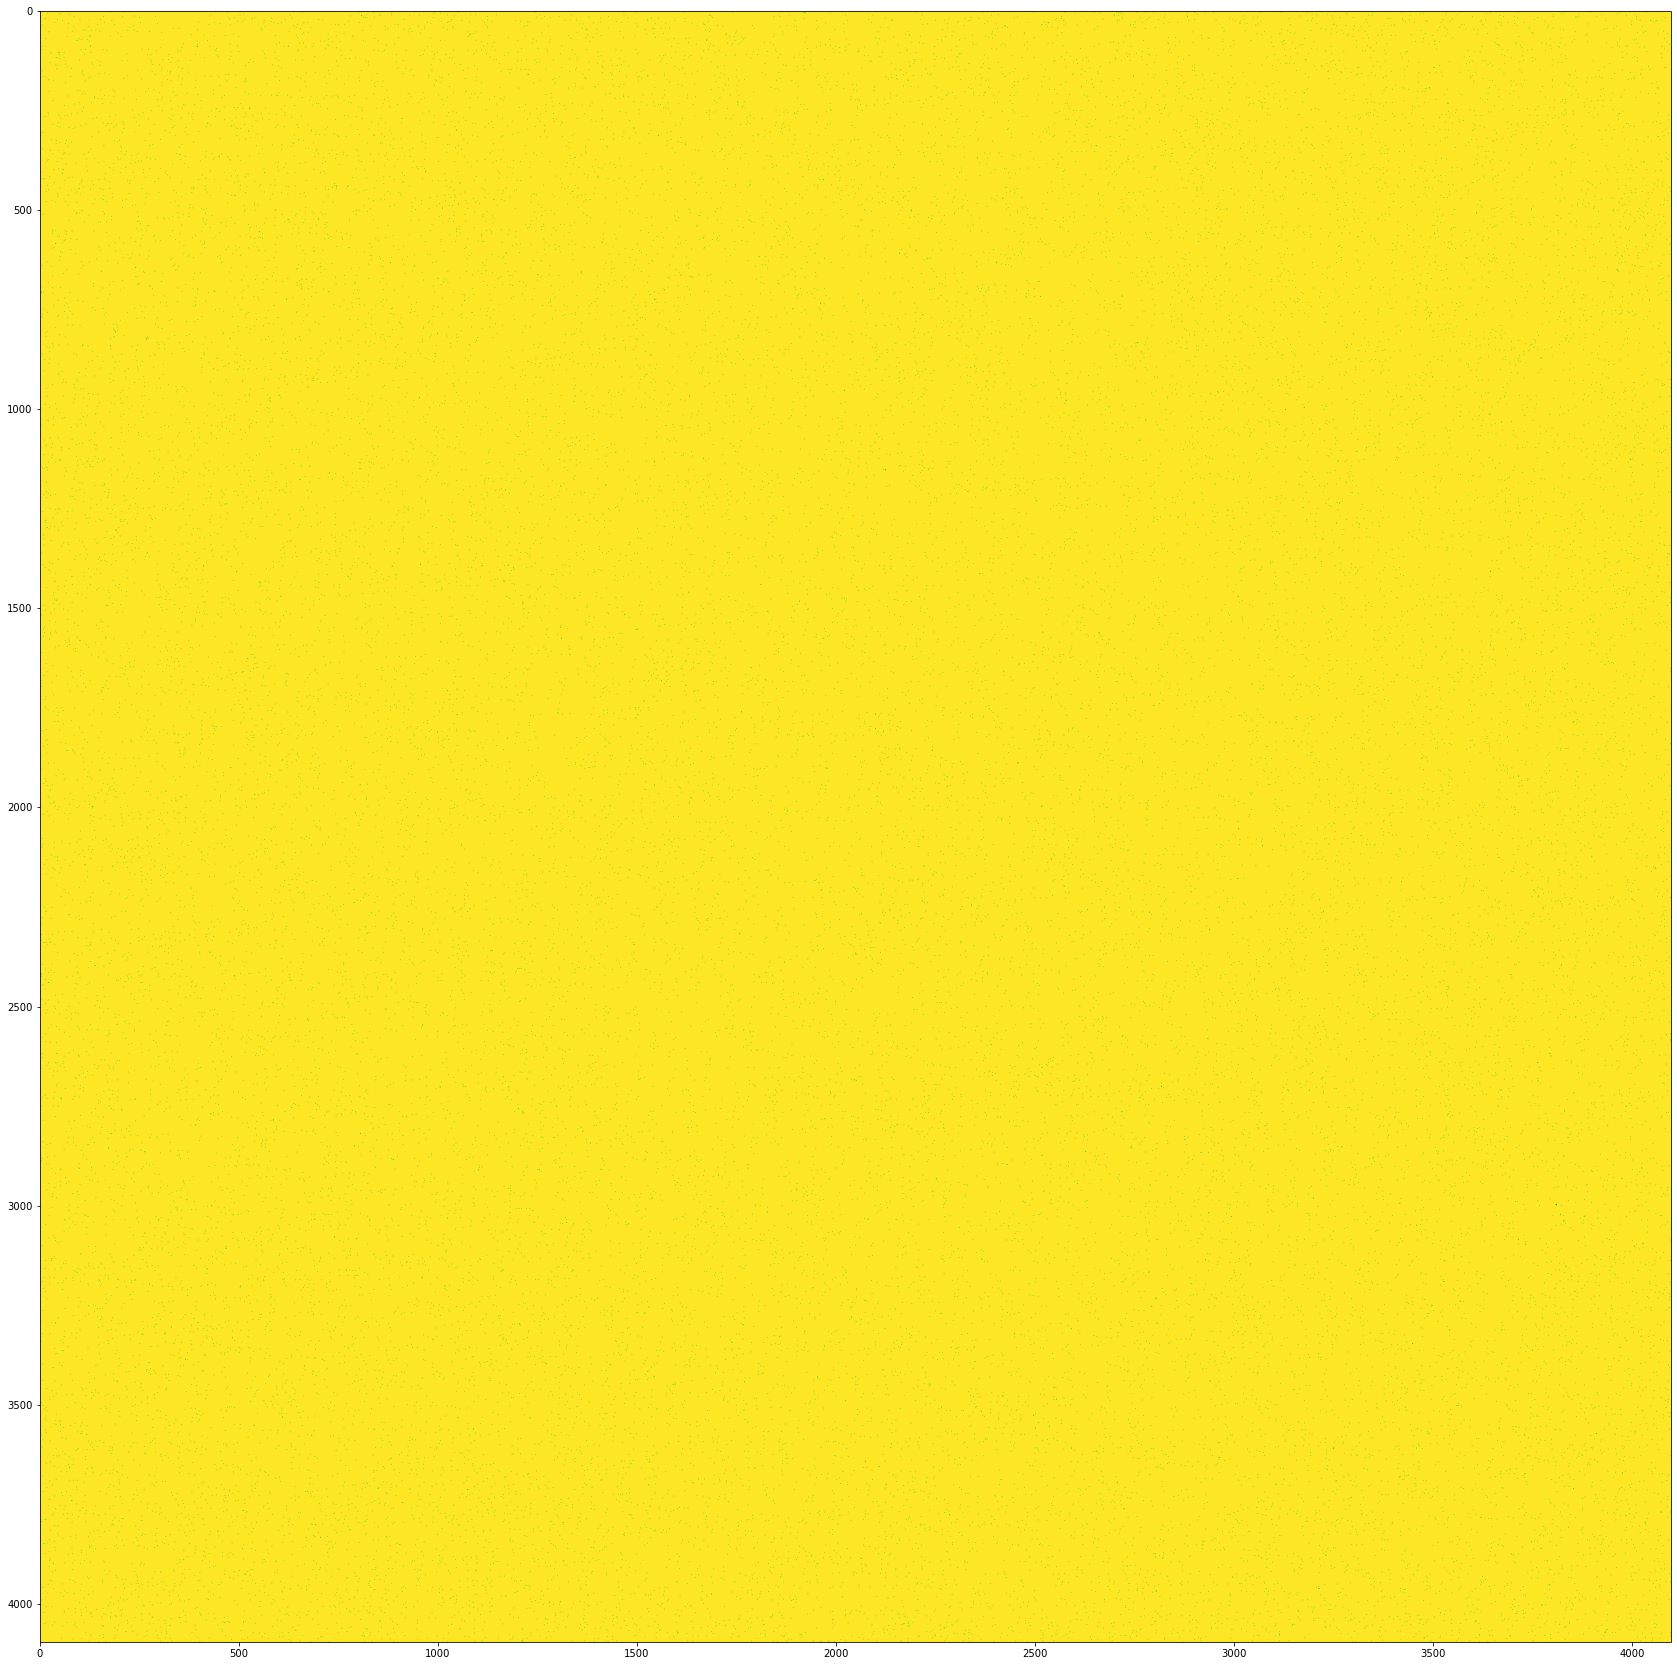

In [10]:
plt.figure(figsize=(30,30))
plt.imshow(d2)

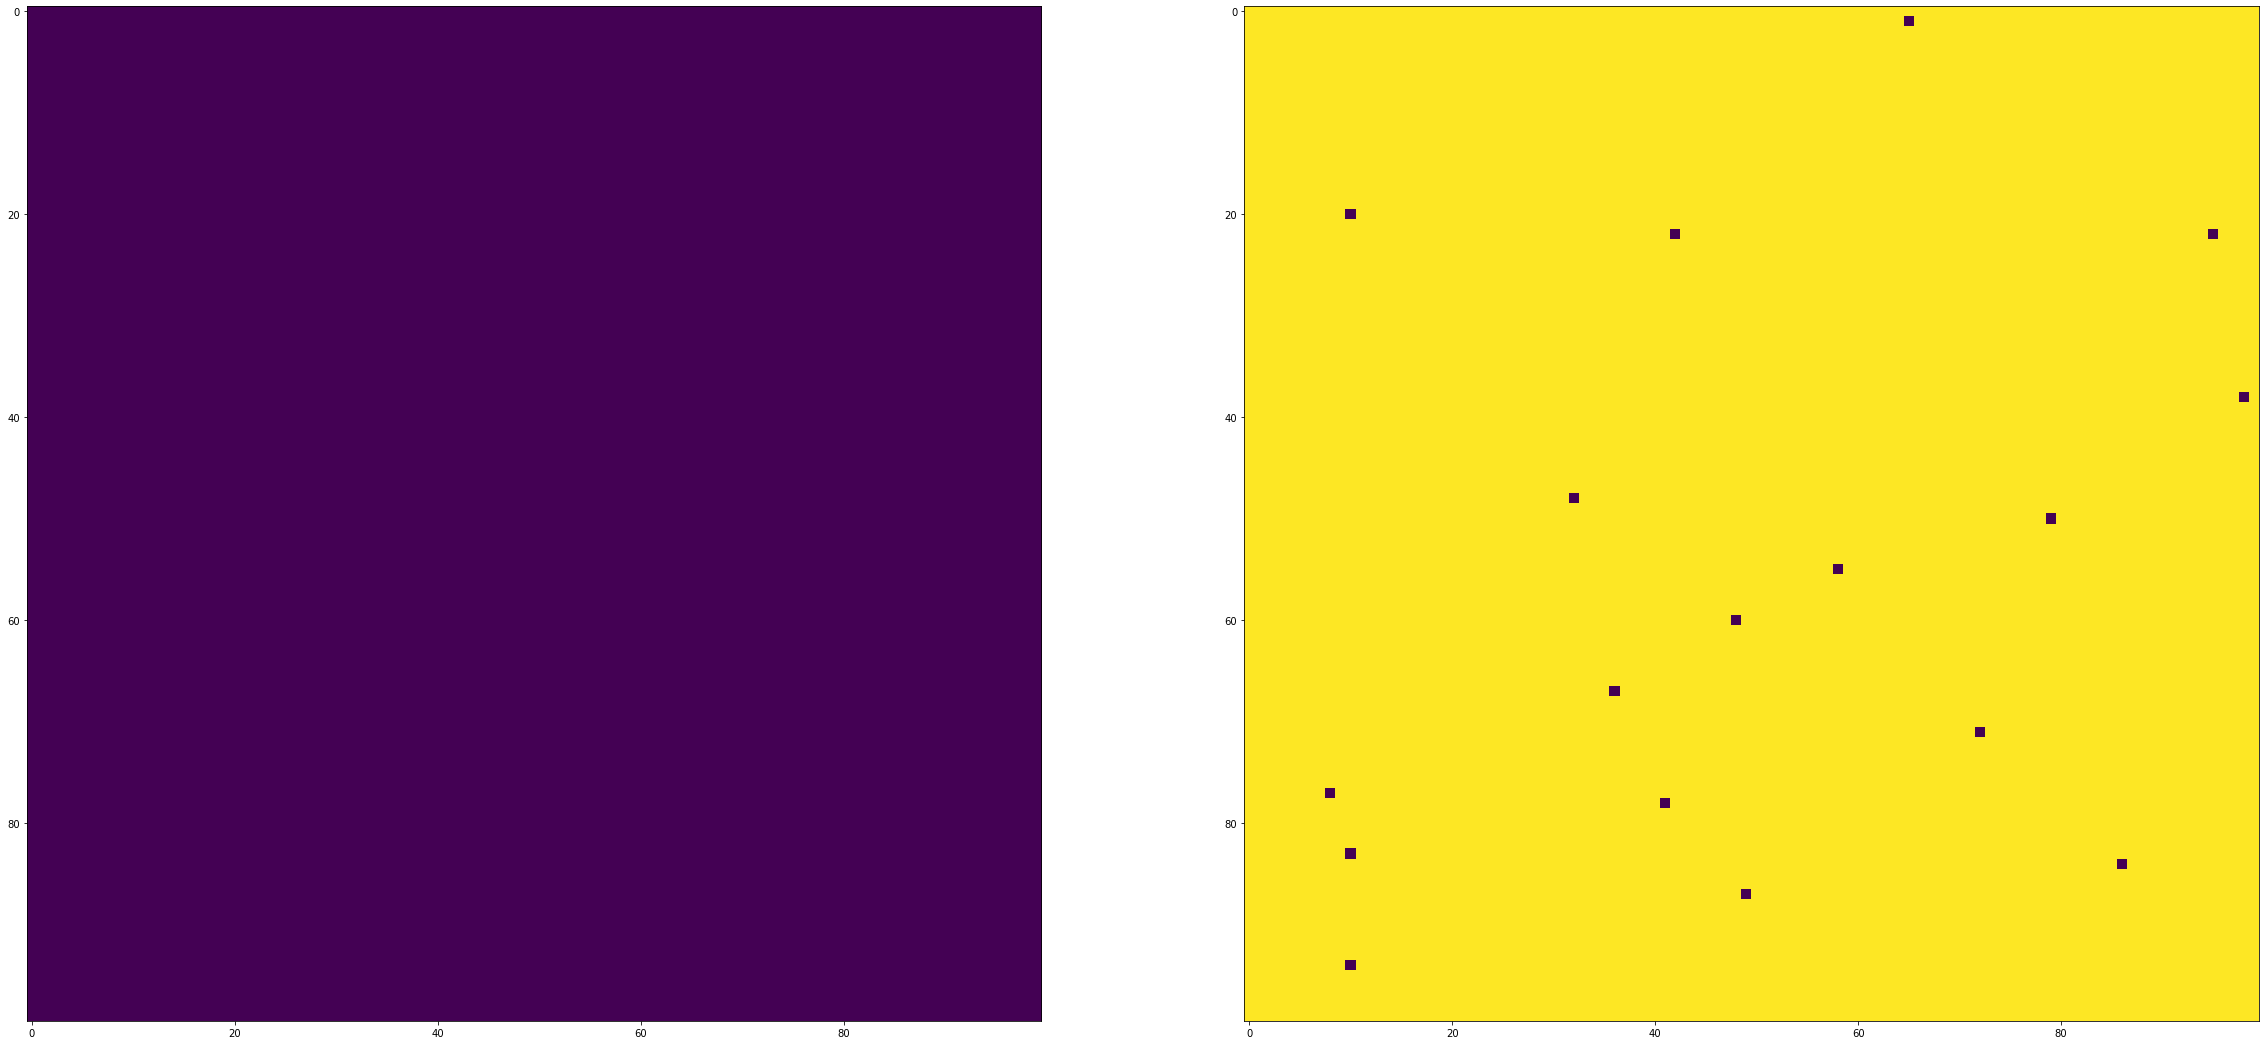

In [11]:
fig=plt.figure(figsize=(40,30))
fig.add_subplot(1,2,1).imshow(d1[200:300,200:300])
fig.add_subplot(1,2,2).imshow(d2[200:300,200:300])